# Ames Housing Data and Kaggle Challenge
> ## EDA and Data Cleaning
>> Gabriel Perez Prieto

#### Importing Libraries

In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# plot style to be used
plt.style.use('seaborn-whitegrid')

In [3]:
# setting max columns limit
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

#### Loading Data

In [4]:
# reading train dataset into memmory
df = pd.read_csv('../datasets/train.csv')

#### Data Cleaning

In [5]:
# checking the shape of the dataframe
df.shape

(2051, 81)

In [6]:
# printing the first 5 rows
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
# changing the column names to lower and underscore
df.columns = [column.lower().replace(' ','_') for column in df.columns]

In [8]:
# checking all columns of the dataframe
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

#### Handling Null Values

In [9]:
# checking for null values
df.isnull().mean()[df.isnull().mean() > 0].sort_values(ascending=False)

pool_qc           0.995612
misc_feature      0.968308
alley             0.931741
fence             0.804973
fireplace_qu      0.487567
lot_frontage      0.160897
garage_yr_blt     0.055583
garage_cond       0.055583
garage_qual       0.055583
garage_finish     0.055583
garage_type       0.055095
bsmt_exposure     0.028279
bsmtfin_type_2    0.027304
bsmt_cond         0.026816
bsmt_qual         0.026816
bsmtfin_type_1    0.026816
mas_vnr_type      0.010726
mas_vnr_area      0.010726
bsmt_half_bath    0.000975
bsmt_full_bath    0.000975
garage_cars       0.000488
bsmtfin_sf_1      0.000488
bsmtfin_sf_2      0.000488
bsmt_unf_sf       0.000488
garage_area       0.000488
total_bsmt_sf     0.000488
dtype: float64

In [10]:
# transform columns to numerical - This will fix some null values as well!

qualitative_to_numeric_dict = {'pool_qc': {'Ex': 5, 
                                           'Gd': 4,
                                           'TA': 3,
                                           'Fa': 2,
                                            np.nan: 0},
                               'misc_feature': {'Elev': 5,
                                                'Gar2': 4,
                                                'Othr': 3,
                                                'Shed': 2,
                                                'TenC': 1,
                                                 np.nan: 0},
                               'alley': {'Grvl': 2,
                                         'Pave': 1,
                                          np.nan: 0},
                               'fence': {'GdPrv': 4,
                                         'MnPrv': 3,
                                         'GdWo': 2,
                                         'MnWw': 1,
                                          np.nan: 0},
                               'fireplace_qu': {'Ex': 5, 
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1,
                                                 np.nan: 0},
                               'garage_cond': {'Ex': 5, 
                                               'Gd': 4,
                                               'TA': 3,
                                               'Fa': 2,
                                               'Po': 1,
                                                np.nan: 0},
                               'garage_qual': {'Ex': 5, 
                                               'Gd': 4,
                                               'TA': 3,
                                               'Fa': 2,
                                               'Po': 1,
                                                np.nan: 0},
                               'garage_finish': {'Fin': 3,
                                                 'RFn': 2,
                                                 'Unf': 1,
                                                 np.nan: 0},
                               'garage_type': {'2Types': 6,
                                               'Attchd': 5,
                                               'Basment': 4,
                                               'BuiltIn': 3,
                                               'CarPort': 2,
                                               'Detchd': 1,
                                                np.nan: 0},
                               'bsmt_exposure': {'Gd': 4,
                                                 'Av': 3,
                                                 'Mn': 2,
                                                 'No': 1,
                                                  np.nan: 0},
                               'bsmtfin_type_2': {'GLQ': 6,
                                                  'ALQ': 5,
                                                  'BLQ': 4,
                                                  'Rec': 3,
                                                  'LwQ': 2,
                                                  'Unf': 1,
                                                   np.nan: 0},
                               'bsmt_cond': {'Ex': 5, 
                                             'Gd': 4,
                                             'TA': 3,
                                             'Fa': 2,
                                             'Po': 1,
                                              np.nan: 0},
                               'bsmt_qual': {'Ex': 5, 
                                             'Gd': 4,
                                             'TA': 3,
                                             'Fa': 2,
                                             'Po': 1,
                                              np.nan: 0},
                               'bsmtfin_type_1': {'GLQ': 6,
                                                  'ALQ': 5,
                                                  'BLQ': 4,
                                                  'Rec': 3,
                                                  'LwQ': 2,
                                                  'Unf': 1,
                                                   np.nan: 0},
                               'mas_vnr_type': {'BrkCmn': 4,
                                                'BrkFace': 3,
                                                'CBlock': 2,
                                                'None': 0,
                                                 np.nan: 0,
                                                'Stone': 1},
                               'exter_qual': {'Ex': 5, 
                                              'Gd': 4,
                                              'TA': 3,
                                              'Fa': 2,
                                              'Po': 1},
                               'exter_cond': {'Ex': 5, 
                                              'Gd': 4,
                                              'TA': 3,
                                              'Fa': 2,
                                              'Po': 1},
                               'heating_qc': {'Ex': 5, 
                                              'Gd': 4,
                                              'TA': 3,
                                              'Fa': 2,
                                              'Po': 1},
                               'central_air': {'Y': 1, 
                                               'N': 0},
                               'kitchen_qual': {'Ex': 5, 
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1},
                               'electrical': {'SBrkr': 4,
                                              'FuseA': 3,
                                              'FuseF': 2,
                                              'FuseP': 1,
                                              'Mix': 0}
                              }  

In [11]:
# replace qualitative values by a range of integers
df.replace(qualitative_to_numeric_dict, inplace=True)

In [12]:
# checking for null columns again as see what is left
df.isnull().mean()[df.isnull().mean() > 0].sort_values(ascending=False)

lot_frontage      0.160897
garage_yr_blt     0.055583
mas_vnr_area      0.010726
bsmt_half_bath    0.000975
bsmt_full_bath    0.000975
garage_area       0.000488
garage_cars       0.000488
total_bsmt_sf     0.000488
bsmt_unf_sf       0.000488
bsmtfin_sf_2      0.000488
bsmtfin_sf_1      0.000488
dtype: float64

#### Filling NaN

In [13]:
# list of columns with null values
null_columns = [column for column in df.columns if df[column].isnull().sum() > 0]

In [14]:
#adding salesprice columns to check correlations between possible features and target variable
null_columns.append('saleprice')

In [15]:
# checking correlation of null_columns with target variable 'saleprice'
df[null_columns].corr()['saleprice'].sort_values(ascending=False)

saleprice         1.000000
garage_area       0.650270
garage_cars       0.648220
total_bsmt_sf     0.628925
garage_yr_blt     0.533922
mas_vnr_area      0.512230
bsmtfin_sf_1      0.423519
lot_frontage      0.341842
bsmt_full_bath    0.283662
bsmt_unf_sf       0.190210
bsmtfin_sf_2      0.016255
bsmt_half_bath   -0.045328
Name: saleprice, dtype: float64

In [16]:
# fill null values with 0 for columns with lower correlation with 'saleprice'
df['bsmtfin_sf_1'].fillna(0, inplace=True)
df['bsmtfin_sf_2'].fillna(0, inplace=True)
df['bsmt_unf_sf'].fillna(0, inplace=True)
df['total_bsmt_sf'].fillna(0, inplace=True)
df['garage_cars'].fillna(0, inplace=True)
df['garage_area'].fillna(0, inplace=True)
df['bsmt_full_bath'].fillna(0, inplace=True)
df['bsmt_half_bath'].fillna(0, inplace=True)

# fill null values with the mean() for columns with higher correlation with 'saleprice'
df['mas_vnr_area'].fillna(df['mas_vnr_area'].median(), inplace=True)
df['garage_yr_blt'].fillna(df['garage_yr_blt'].median(), inplace=True)
df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace=True)

In [17]:
# checking variable types
df.dtypes.head()

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
dtype: object

In [18]:
# checking for duplicated values
df.duplicated().mean()

0.0

### EDA ( Exploratory Data Analysis )

In [19]:
df['saleprice'].median()

162500.0

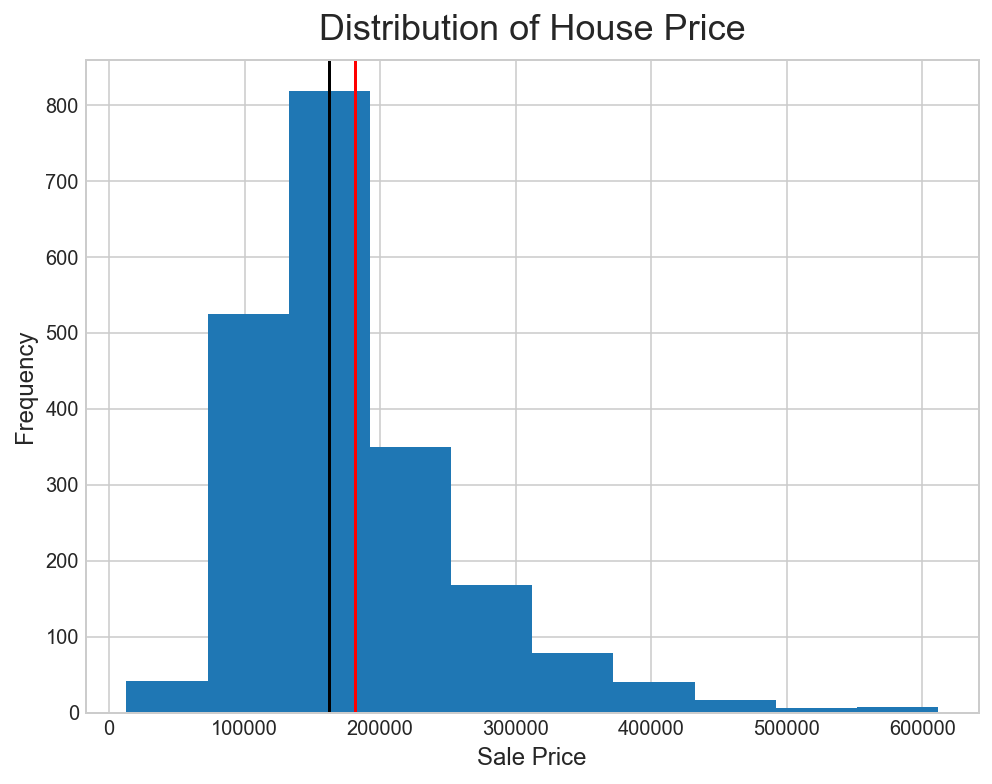

In [20]:
# plotting distribution of sale price
plt.figure(figsize=(8,6))
# df['saleprice'].hist()
plt.hist(df['saleprice'], bins=10)
plt.title('Distribution of House Price', size=18, pad=10)
plt.xlabel('Sale Price', size=12)
plt.ylabel('Frequency', size=12)
plt.axvline(df['saleprice'].mean(), color='red')
plt.axvline(df['saleprice'].median(), color='black');

In [21]:
# define numerical and nominal columns
numerical_variables = df.select_dtypes(include='number')
nominal_variables = df.select_dtypes(exclude='number')

In [22]:
# convert to integers nominal variables that were transformed into numerical
for var in nominal_variables.columns.values:
    try:
        df[var] = df[var].astype(int)
    except:
        continue

# redefine numerical and nominal columns
numerical_variables = df.select_dtypes(include='number')
nominal_variables = df.select_dtypes(exclude='number')

In [23]:
# correlations with target variable ['saleprice']
correlations_saleprice = df.corr()[['saleprice']].abs().sort_values(['saleprice'], ascending=False)

In [24]:
# creating a list with column names for columns with correlation > .5 with ['saleprice']
strong_correlations = correlations_saleprice.loc[correlations_saleprice['saleprice'] >= .5][1:].index.values

In [25]:
# printing numerical variables with strong_correlation with ['saleprice'] 
strong_correlations

array(['overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual',
       'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf',
       'bsmt_qual', 'year_built', 'garage_finish', 'year_remod/add',
       'fireplace_qu', 'full_bath', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area'], dtype=object)

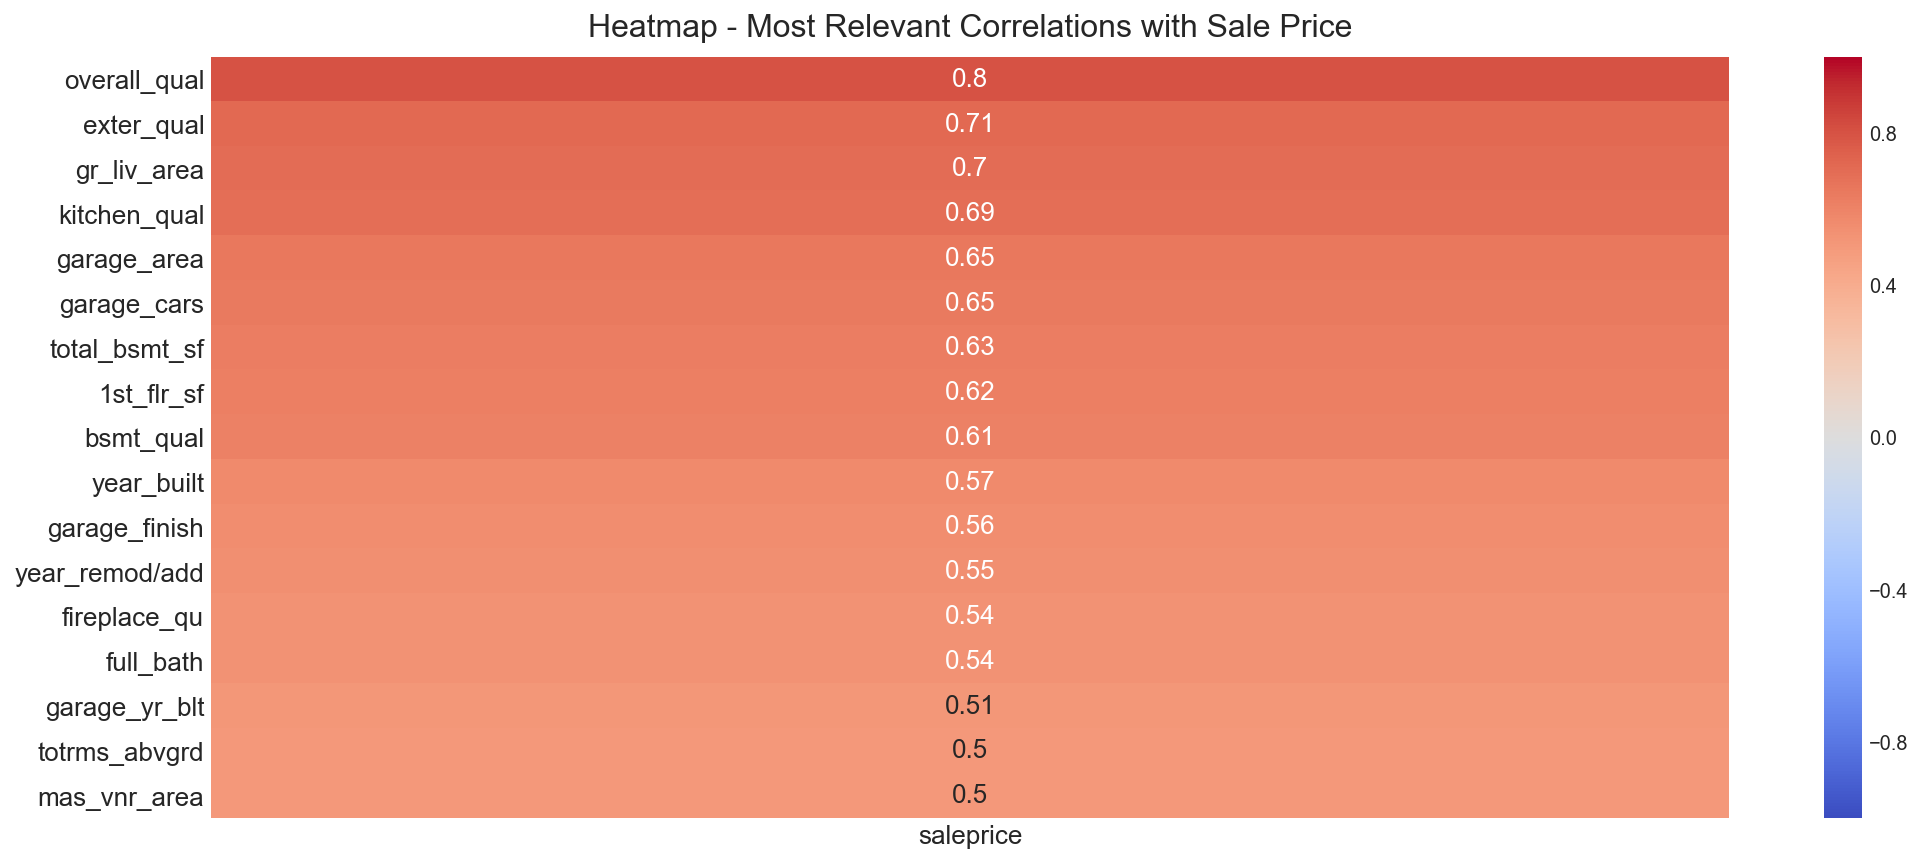

In [26]:
# creating a heatmap for the most relevant correlations with saleprice

plt.figure(figsize=(17,7))
sns.heatmap(correlations_saleprice.loc[correlations_saleprice['saleprice'] >= .5][1:],
            annot=True, annot_kws={"size": 13}, cmap='coolwarm', vmin=-1, vmax=1)
plt.yticks(size=13)
plt.xticks(size=13)
plt.title('Heatmap - Most Relevant Correlations with Sale Price', size=16, pad=10);

#### Scatterplots of  Variables with Strong Correlation with Saleprice

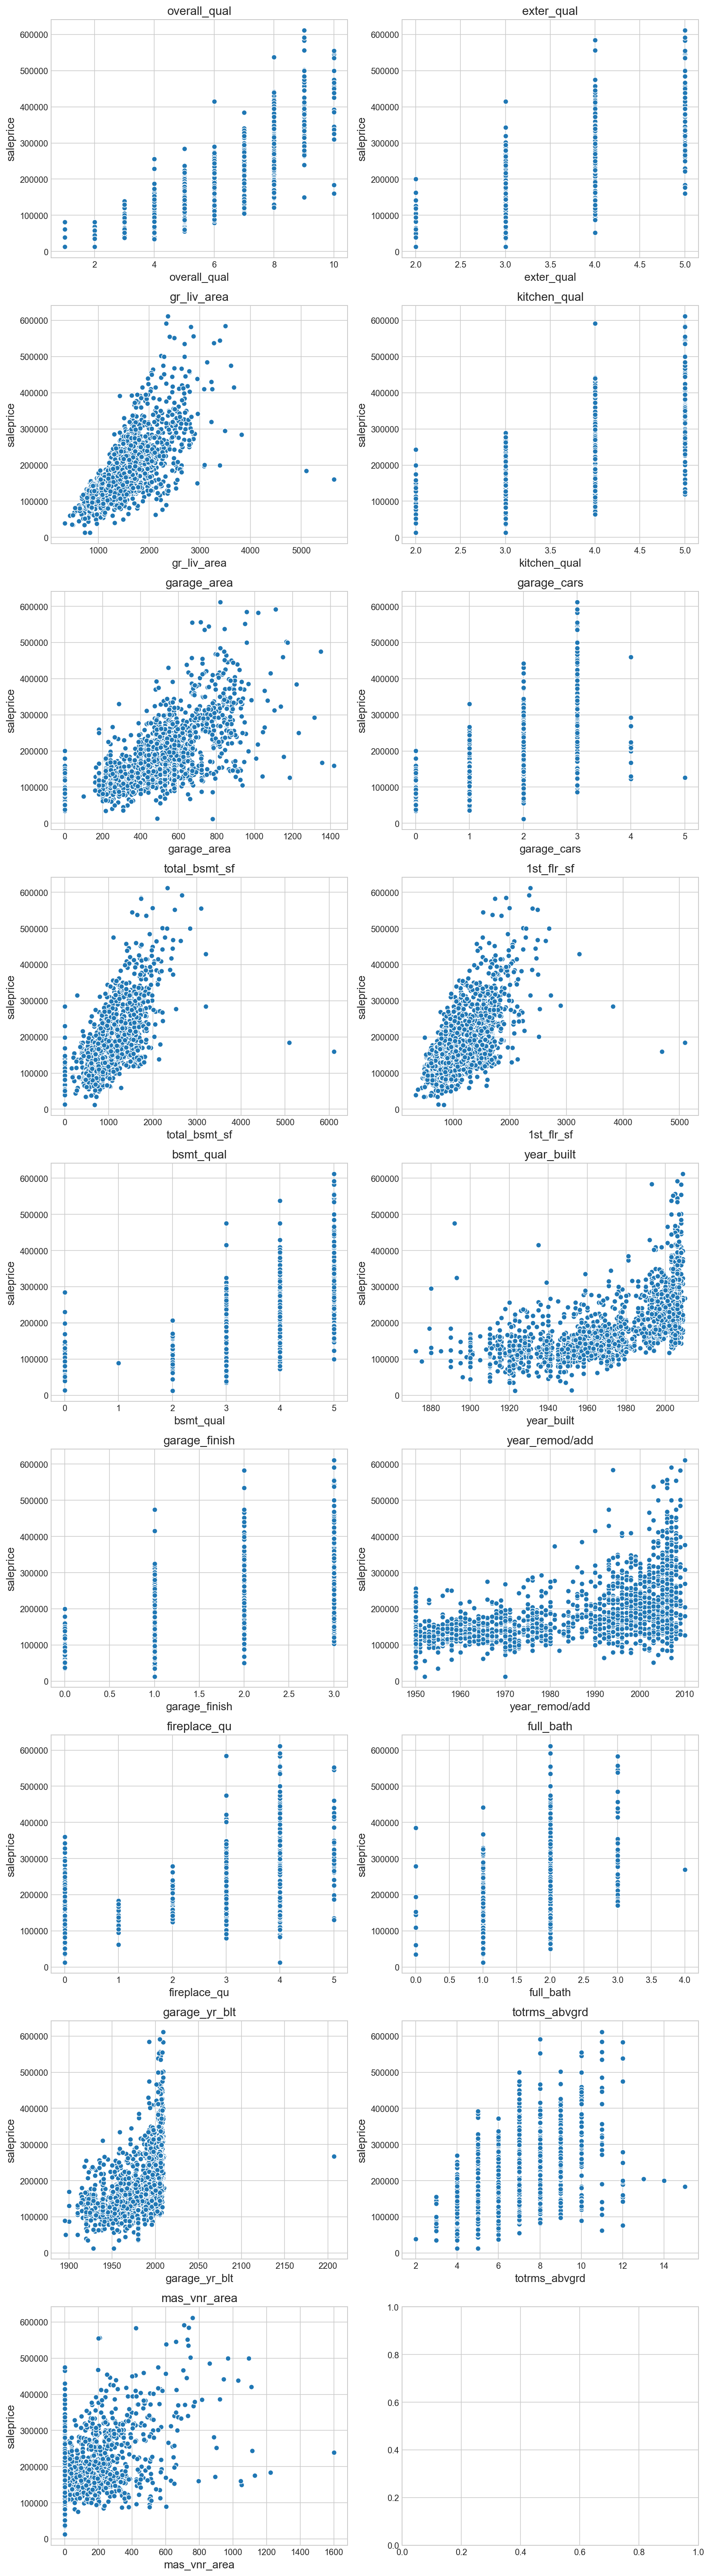

In [27]:
# creating scatterplots for numerical variables with ['saleprice']
nrows=int(np.ceil((len(strong_correlations))/2))
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize= (12, 2.5 * len(strong_correlations)))

plt.tight_layout(pad=4)
ax = ax.ravel() 
for index, column in enumerate(strong_correlations):
    sns.scatterplot(x = df[column], y = df['saleprice'], ax=ax[index]) 
    ax[index].set_title(strong_correlations[index], size=14)
    ax[index].set_xlabel(strong_correlations[index], size=13)
    ax[index].set_ylabel('saleprice', size=13);

#### Chcecking Outliers - From Scatterplots

In [28]:
df.loc[df['gr_liv_area'] > 5000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,1,796.0,5,3,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,1,4,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,Typ,3,4,5,2008.0,3,2.0,1418.0,3,3,Y,214,292,0,0,0,480,4,0,0,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,1,1224.0,5,3,PConc,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,1,4,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,Typ,2,4,5,2008.0,3,3.0,1154.0,3,3,Y,546,484,0,0,0,0,0,0,5,17000,10,2007,New,183850


In [29]:
df.loc[df['garage_cars'] == 5]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
925,747,903236040,30,RM,50.0,8635,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1925,1950,Hip,CompShg,Wd Sdng,Wd Sdng,0,0.0,3,2,BrkTil,3,3,1,2,134.0,1,0.0,938.0,1072.0,GasA,3,1,4,1072,0,0,1072,1.0,0.0,1,0,2,1,3,5,Typ,0,0,1,1982.0,1,5.0,1184.0,2,3,P,0,0,105,0,0,0,0,0,0,0,8,2009,WD,126500


In [30]:
df.loc[df['total_bsmt_sf'] > 5000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,1,796.0,5,3,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,1,4,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,Typ,3,4,5,2008.0,3,2.0,1418.0,3,3,Y,214,292,0,0,0,480,4,0,0,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,1,1224.0,5,3,PConc,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,1,4,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,Typ,2,4,5,2008.0,3,3.0,1154.0,3,3,Y,546,484,0,0,0,0,0,0,5,17000,10,2007,New,183850


In [31]:
df.loc[df['1st_flr_sf'] > 3000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
328,1773,528366050,20,RL,68.0,12692,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,0,0.0,4,3,PConc,4,3,1,6,1231.0,1,0.0,1969.0,3200.0,GasA,5,1,4,3228,0,0,3228,1.0,0.0,3,0,4,1,4,10,Typ,1,4,5,1992.0,2,2.0,546.0,3,3,Y,264,75,291,0,0,0,0,0,0,0,5,2007,WD,430000
616,1498,908154080,20,RL,123.0,47007,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0,0.0,3,3,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,3,1,4,3820,0,0,3820,0.0,0.0,3,1,5,1,5,11,Typ,2,4,5,1959.0,1,2.0,624.0,3,3,Y,0,372,0,0,0,0,0,0,0,0,7,2008,WD,284700
960,1499,908154235,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,1,796.0,5,3,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,1,4,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,Typ,3,4,5,2008.0,3,2.0,1418.0,3,3,Y,214,292,0,0,0,480,4,0,0,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,1,1224.0,5,3,PConc,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,1,4,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,Typ,2,4,5,2008.0,3,3.0,1154.0,3,3,Y,546,484,0,0,0,0,0,0,5,17000,10,2007,New,183850


In [32]:
df.loc[df['garage_yr_blt'] > 2200]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,0,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,0,0.0,4,3,PConc,4,3,3,6,583.0,1,0.0,963.0,1546.0,GasA,5,1,4,1564,0,0,1564,0.0,0.0,2,0,2,1,5,6,Typ,1,4,5,2207.0,2,2.0,502.0,3,3,Y,132,0,0,0,0,0,0,0,0,0,9,2007,New,267300


In [33]:
df.loc[df['mas_vnr_area'] > 1500]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1409,1850,533241030,60,FV,66.0,7399,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,3,1600.0,4,3,PConc,4,3,1,4,649.0,1,0.0,326.0,975.0,GasA,5,1,4,975,975,0,1950,0.0,0.0,2,1,3,1,4,7,Typ,1,3,1,1997.0,2,2.0,576.0,3,3,Y,0,10,0,0,198,0,0,0,0,0,6,2007,WD,239000


In [34]:
# dropping outliers
rows_to_drop = [960, 1885, 925, 328, 616, 1699, 1409]
for row in rows_to_drop:
    df.drop(row, inplace=True)

#### Histograms for Numerical Variables

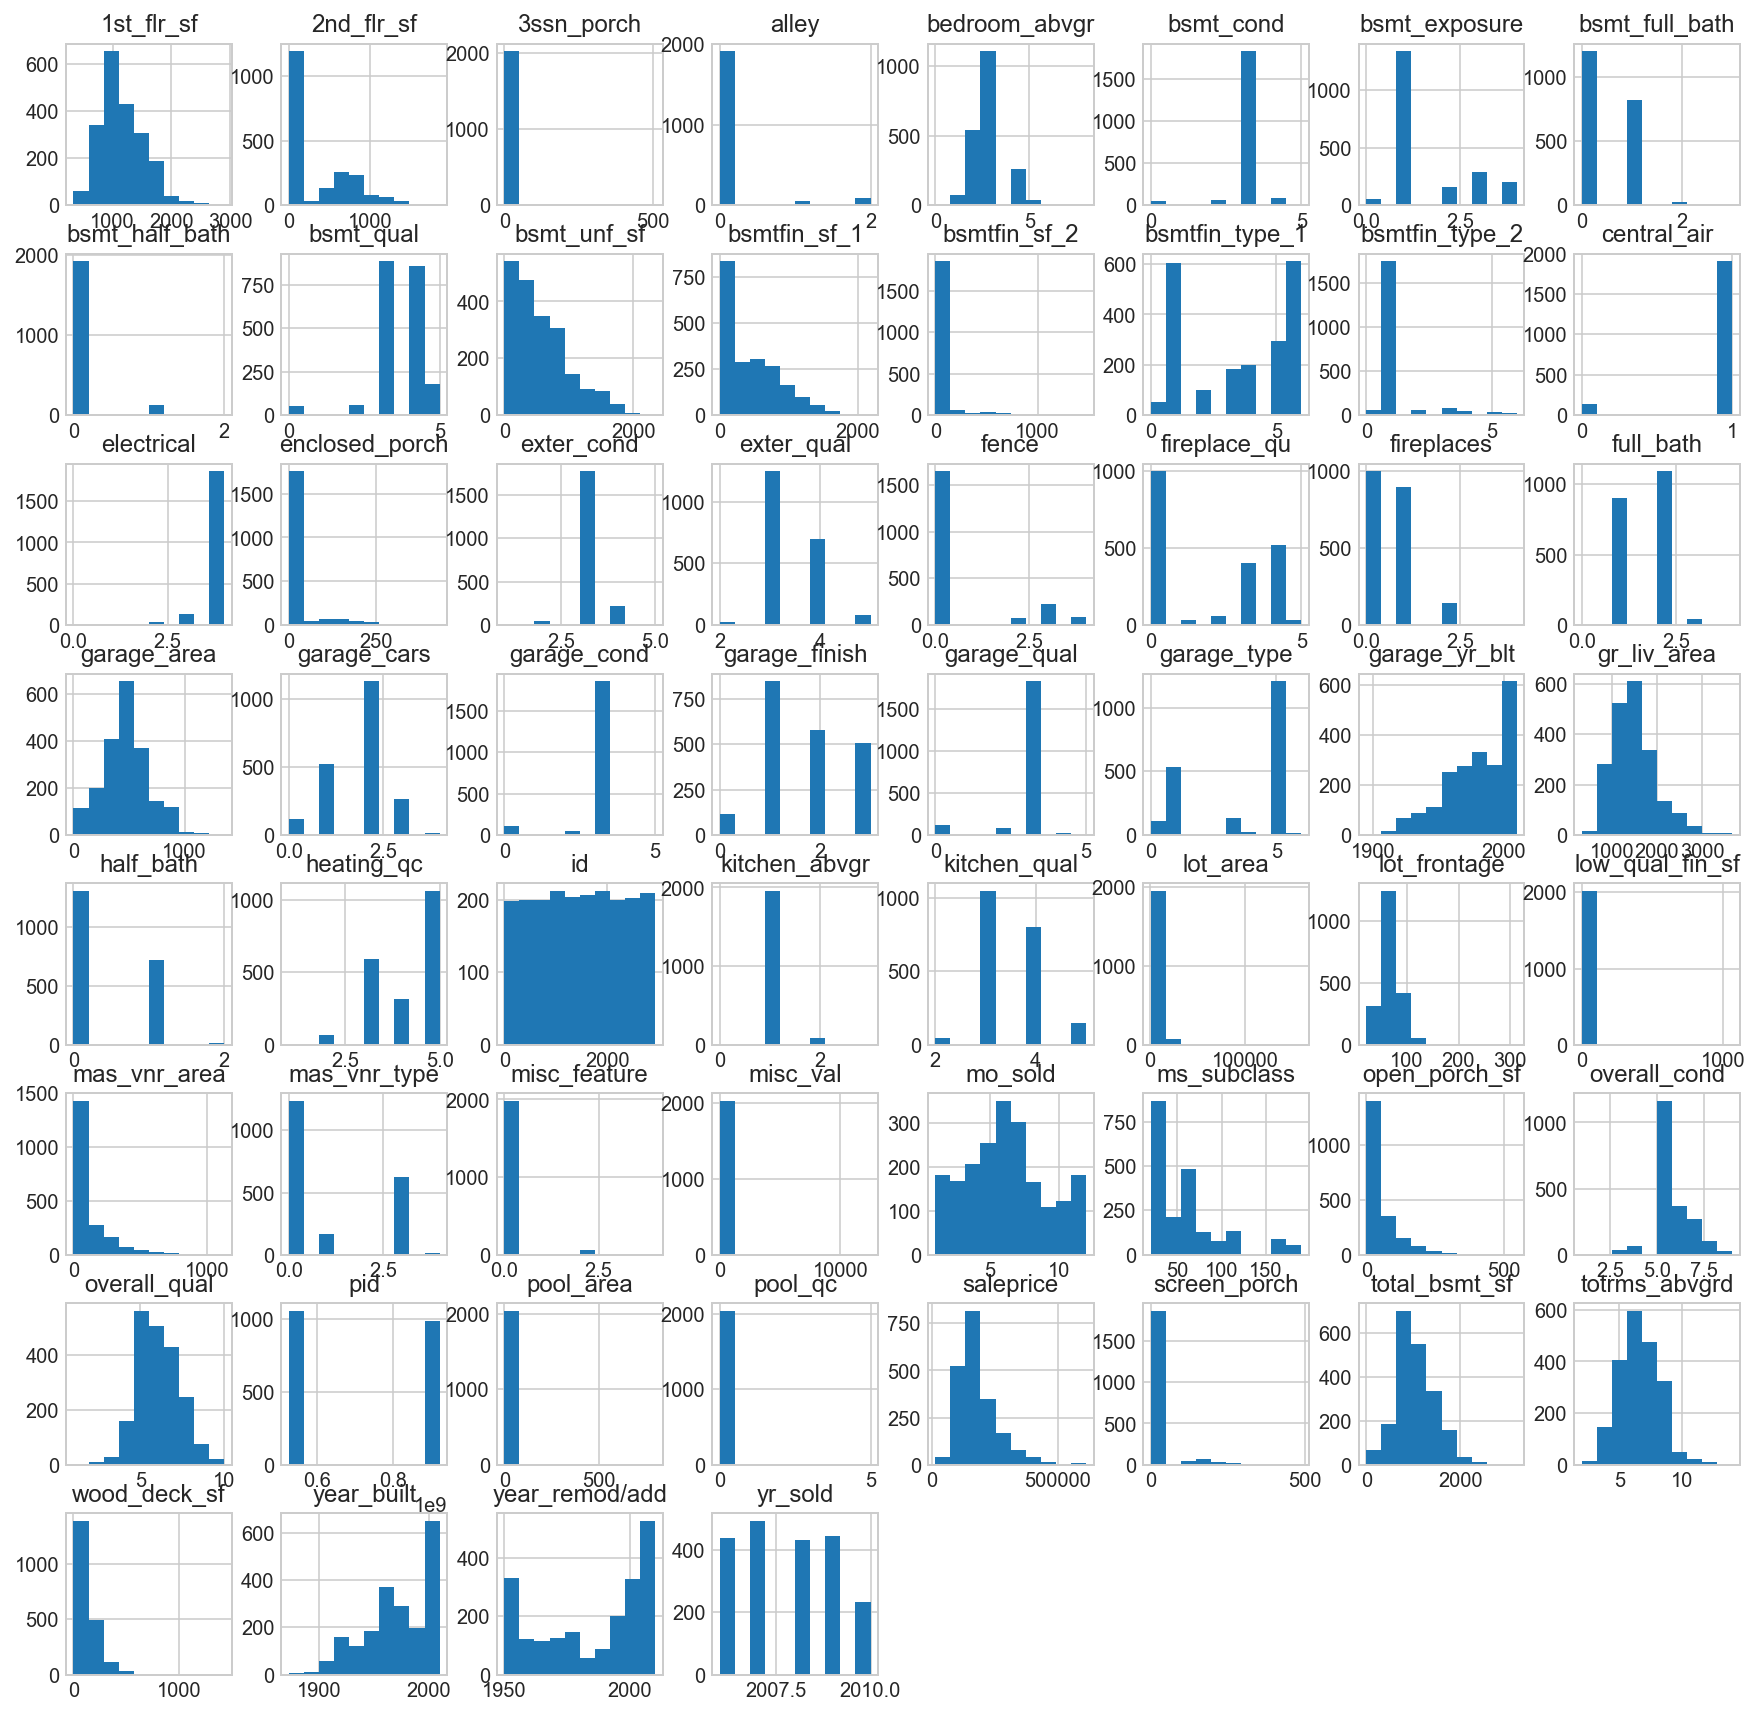

In [35]:
# plotting histograms for every numerical column - checking distributions
df.hist(figsize=(15,15));

#### Correlation Amongst Strong Correlated Variables ( With SalePrice ) - Look for Possible Interaction Terms

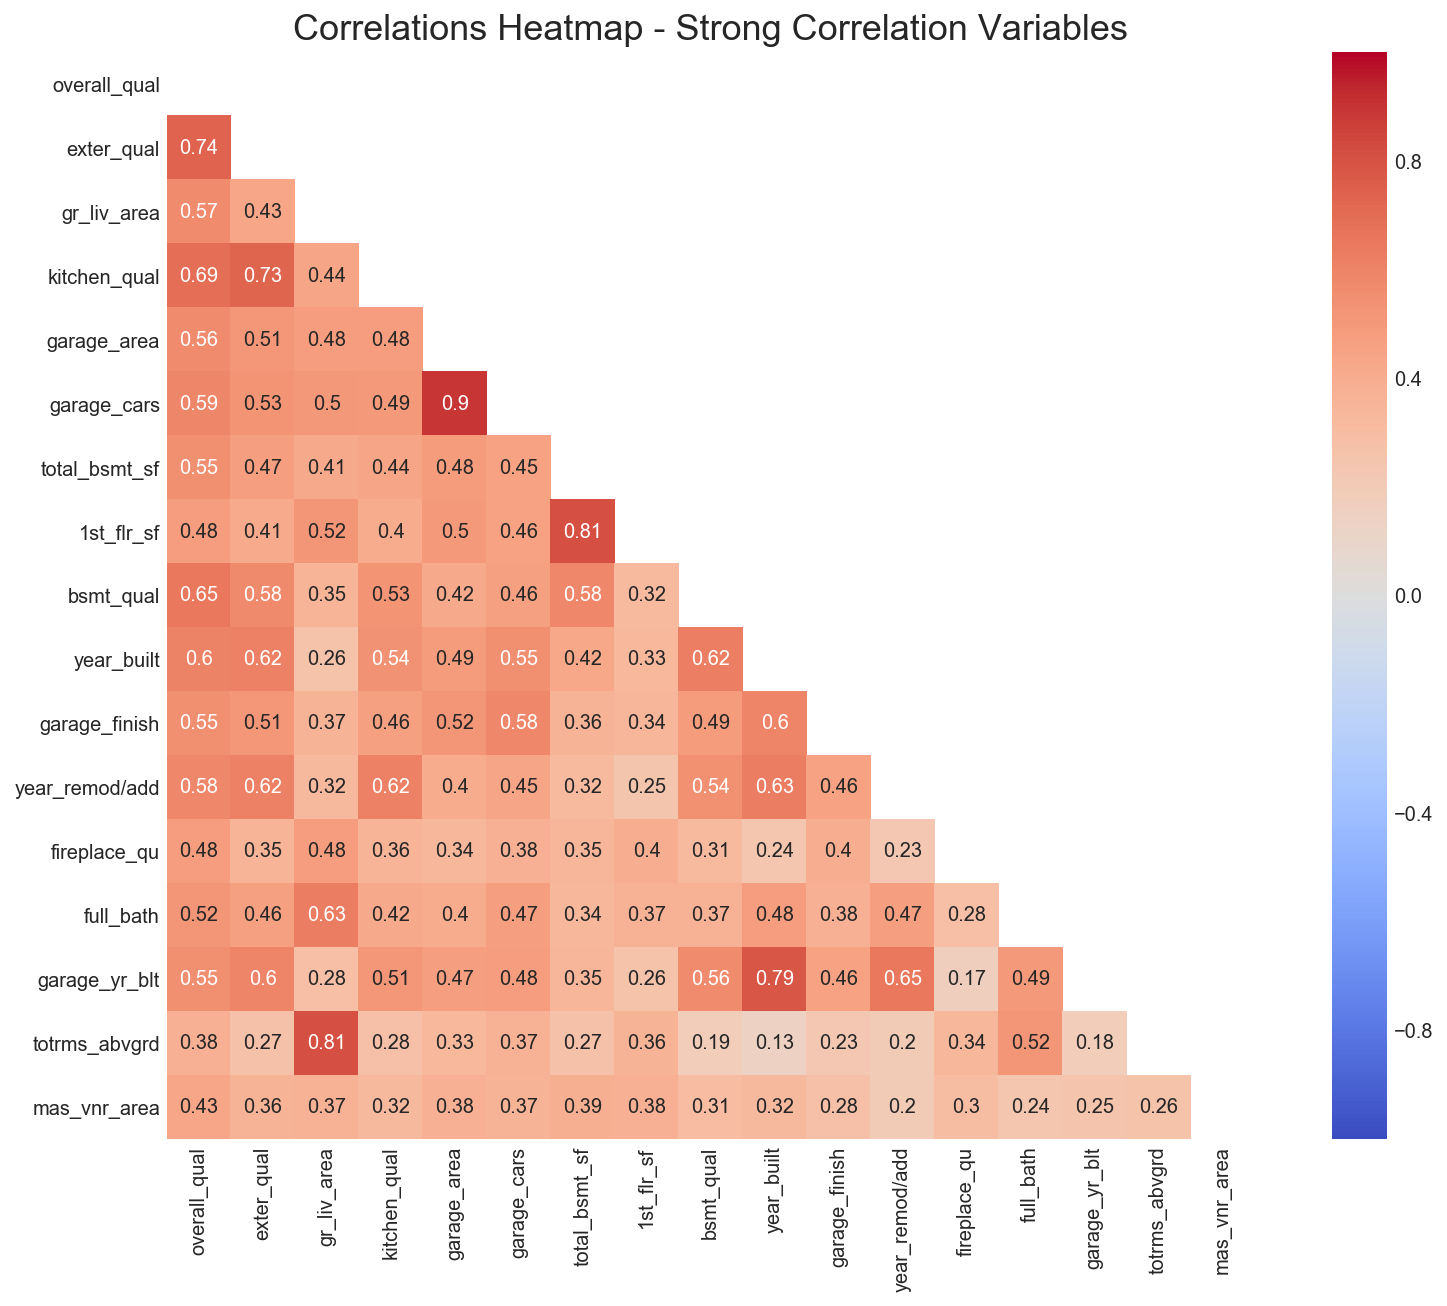

In [36]:
# plotting heatmap to look for possible interaction terms

# create a figure
plt.figure(figsize=(14,10))

# correlations data
corr = df[strong_correlations].corr()

# Set up mask so triangle at the top is white
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set title
plt.title('Correlations Heatmap - Strong Correlation Variables',fontsize=18)

# create heatmap
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='coolwarm', vmin=-1, vmax=1);

# Adapted from https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Creating Interaction Terms Between Strongly Correlated Variables
> ##### Correlation > .7

In [37]:
# creating df['garage_area * garage_cars']
df['garage_area * garage_cars'] = df['garage_area'] * df['garage_cars']

# creating df['totrms_abvgrd * gr_liv_area']
df['totrms_abvgrd * gr_liv_area'] = df['totrms_abvgrd'] * df['gr_liv_area']

# creating df['1st_flr_sf * total_bsmt_sf']
df['1st_flr_sf * total_bsmt_sf'] = df['1st_flr_sf'] * df['total_bsmt_sf']

# creating df['garage_yr_blt * year_built']
df['garage_yr_blt * year_built'] = df['garage_yr_blt'] * df['year_built']

#### Creating Interaction Terms For Other Variables
> ##### Criteria: Create a total sq_ft for the house

In [38]:
# creating df['total_area']
df['total_area'] = df['total_bsmt_sf'] + df['1st_flr_sf'] + df['2nd_flr_sf'] \
                   + df['gr_liv_area'] + df['garage_area']

> ##### Criteria: Polynomial Features

In [39]:
# preprocessing for polynomial features for numerical variables
features = numerical_variables.columns
X = df[features]
X.head()

,id,pid,ms_subclass,lot_frontage,lot_area,alley,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,68.0,13517,0,6,8,1976,2005,3,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,1,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,0,0,5,1976.0,2,2.0,475.0,3,3,0,44,0,0,0,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,0,7,5,1996,1997,3,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,1,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,1,3,5,1997.0,2,2.0,559.0,3,3,0,74,0,0,0,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,0,5,7,1953,2007,0,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,3,1,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,0,0,1,1953.0,1,1.0,246.0,3,3,0,52,0,0,0,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,0,5,5,2006,2007,0,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,384.0,4,1,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,0,0,3,2007.0,3,2.0,400.0,3,3,100,0,0,0,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,0,6,8,1900,1993,0,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,676.0,3,1,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,0,0,1,1957.0,1,2.0,484.0,3,3,0,59,0,0,0,0,0,0,0,0,3,2010,138500


In [40]:
# instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

In [41]:
# create X_poly
X_poly = poly.fit_transform(X)
X_poly.shape

(2044, 1890)

In [42]:
# feature names created
poly.get_feature_names(features)

['id',
 'pid',
 'ms_subclass',
 'lot_frontage',
 'lot_area',
 'alley',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'pool_qc',
 'fence',
 'misc_feature',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'saleprice',
 'id^2',
 'id pid',
 'id ms_subclass',
 'id lot_frontage',

In [43]:
# view X_poly in a DataFrame
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [44]:
# creating a dataframe with all polynomial features and correlation with 'saleprice'
poly_corr = poly_df.corr()[['saleprice']].abs().sort_values(['saleprice'], ascending=False).head(50)

In [45]:
poly_corr

,saleprice
saleprice,1.000000
yr_sold saleprice,0.999999
year_remod/add saleprice,0.999861
garage_yr_blt saleprice,0.999773
year_built saleprice,0.999655
electrical saleprice,0.990981
overall_qual saleprice,0.978457
exter_qual saleprice,0.971390
kitchen_qual saleprice,0.971069
exter_cond saleprice,0.965553


#### Creating Features with Correlations > .8

In [46]:
# filtering new dataframe to include highest correlated variables that are not rengineered using saleprice
new_features_eng = poly_corr.loc[(poly_corr['saleprice'] >= .8) & (poly_corr['saleprice'] <.875)]
new_features_eng

,saleprice
overall_qual gr_liv_area,0.872198
exter_qual gr_liv_area,0.853728
garage_type saleprice,0.853103
gr_liv_area kitchen_qual,0.845539
bsmt_qual gr_liv_area,0.844279
overall_qual 1st_flr_sf,0.840806
overall_qual kitchen_qual,0.838665
overall_qual exter_qual,0.834606
overall_qual^2,0.831658
overall_qual total_bsmt_sf,0.829780


In [47]:
new_features_eng.index

Index(['overall_qual gr_liv_area', 'exter_qual gr_liv_area',
       'garage_type saleprice', 'gr_liv_area kitchen_qual',
       'bsmt_qual gr_liv_area', 'overall_qual 1st_flr_sf',
       'overall_qual kitchen_qual', 'overall_qual exter_qual',
       'overall_qual^2', 'overall_qual total_bsmt_sf',
       'overall_qual garage_area', 'overall_qual garage_cars',
       'total_bsmt_sf gr_liv_area', 'fireplace_qu saleprice',
       'bedroom_abvgr saleprice', 'overall_qual bsmt_qual',
       'overall_qual year_built', 'overall_qual garage_yr_blt',
       'overall_qual totrms_abvgrd', 'gr_liv_area garage_area',
       'overall_qual year_remod/add', 'gr_liv_area garage_cars'],
      dtype='object')

In [48]:
# adding features above to the dataframe: excluding features with saleprice and 
for i in new_features_eng.index:
    try:
        x, y = i.split(' ')
        if y == 'saleprice':
            continue
        else:
            df[x + ' * ' + y] = df[x] * df[y]
    except:
        df[i] = df[i[:len(i)-2]] * df[i[:len(i)-2]]

### Checking Correlation for Interactions Created

In [49]:
# newly engineered variables
final_eng = df.columns[81:].values
final_eng

array(['garage_area * garage_cars', 'totrms_abvgrd * gr_liv_area',
       '1st_flr_sf * total_bsmt_sf', 'garage_yr_blt * year_built',
       'total_area', 'overall_qual * gr_liv_area',
       'exter_qual * gr_liv_area', 'gr_liv_area * kitchen_qual',
       'bsmt_qual * gr_liv_area', 'overall_qual * 1st_flr_sf',
       'overall_qual * kitchen_qual', 'overall_qual * exter_qual',
       'overall_qual^2', 'overall_qual * total_bsmt_sf',
       'overall_qual * garage_area', 'overall_qual * garage_cars',
       'total_bsmt_sf * gr_liv_area', 'overall_qual * bsmt_qual',
       'overall_qual * year_built', 'overall_qual * garage_yr_blt',
       'overall_qual * totrms_abvgrd', 'gr_liv_area * garage_area',
       'overall_qual * year_remod/add', 'gr_liv_area * garage_cars'],
      dtype=object)

In [50]:
# adding 'saleprice' to check correlation
final_eng_saleprice = df.columns[80:].values

In [51]:
# checking correlations of newly engeneered variables
df[final_eng_saleprice].corr()['saleprice']

saleprice                        1.000000
garage_area * garage_cars        0.705718
totrms_abvgrd * gr_liv_area      0.649710
1st_flr_sf * total_bsmt_sf       0.702681
garage_yr_blt * year_built       0.583546
total_area                       0.839866
overall_qual * gr_liv_area       0.872198
exter_qual * gr_liv_area         0.853728
gr_liv_area * kitchen_qual       0.845539
bsmt_qual * gr_liv_area          0.844279
overall_qual * 1st_flr_sf        0.840806
overall_qual * kitchen_qual      0.838665
overall_qual * exter_qual        0.834606
overall_qual^2                   0.831658
overall_qual * total_bsmt_sf     0.829780
overall_qual * garage_area       0.827483
overall_qual * garage_cars       0.825071
total_bsmt_sf * gr_liv_area      0.824710
overall_qual * bsmt_qual         0.819301
overall_qual * year_built        0.811202
overall_qual * garage_yr_blt     0.809525
overall_qual * totrms_abvgrd     0.809152
gr_liv_area * garage_area        0.809005
overall_qual * year_remod/add    0

### Boxplots for Nominal Variables

In [52]:
# defining a function to create boxplot for nominal variables
def subplot_boxplots(dataframe, list_of_columns):
      
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows,
                           ncols=2,
                           figsize=(15, 5 * nrows))
    plt.tight_layout(pad=4)
    ax = ax.ravel() 
    
    for index, column in enumerate(list_of_columns):
        
        sns.boxplot(x=dataframe[column], y=dataframe['saleprice'] ,ax=ax[index])
        ax[index].set_title(list_of_columns[index], size=14)
        ax[index].set_xlabel(list_of_columns[index], size=13)
        ax[index].set_ylabel('saleprice', size=13)

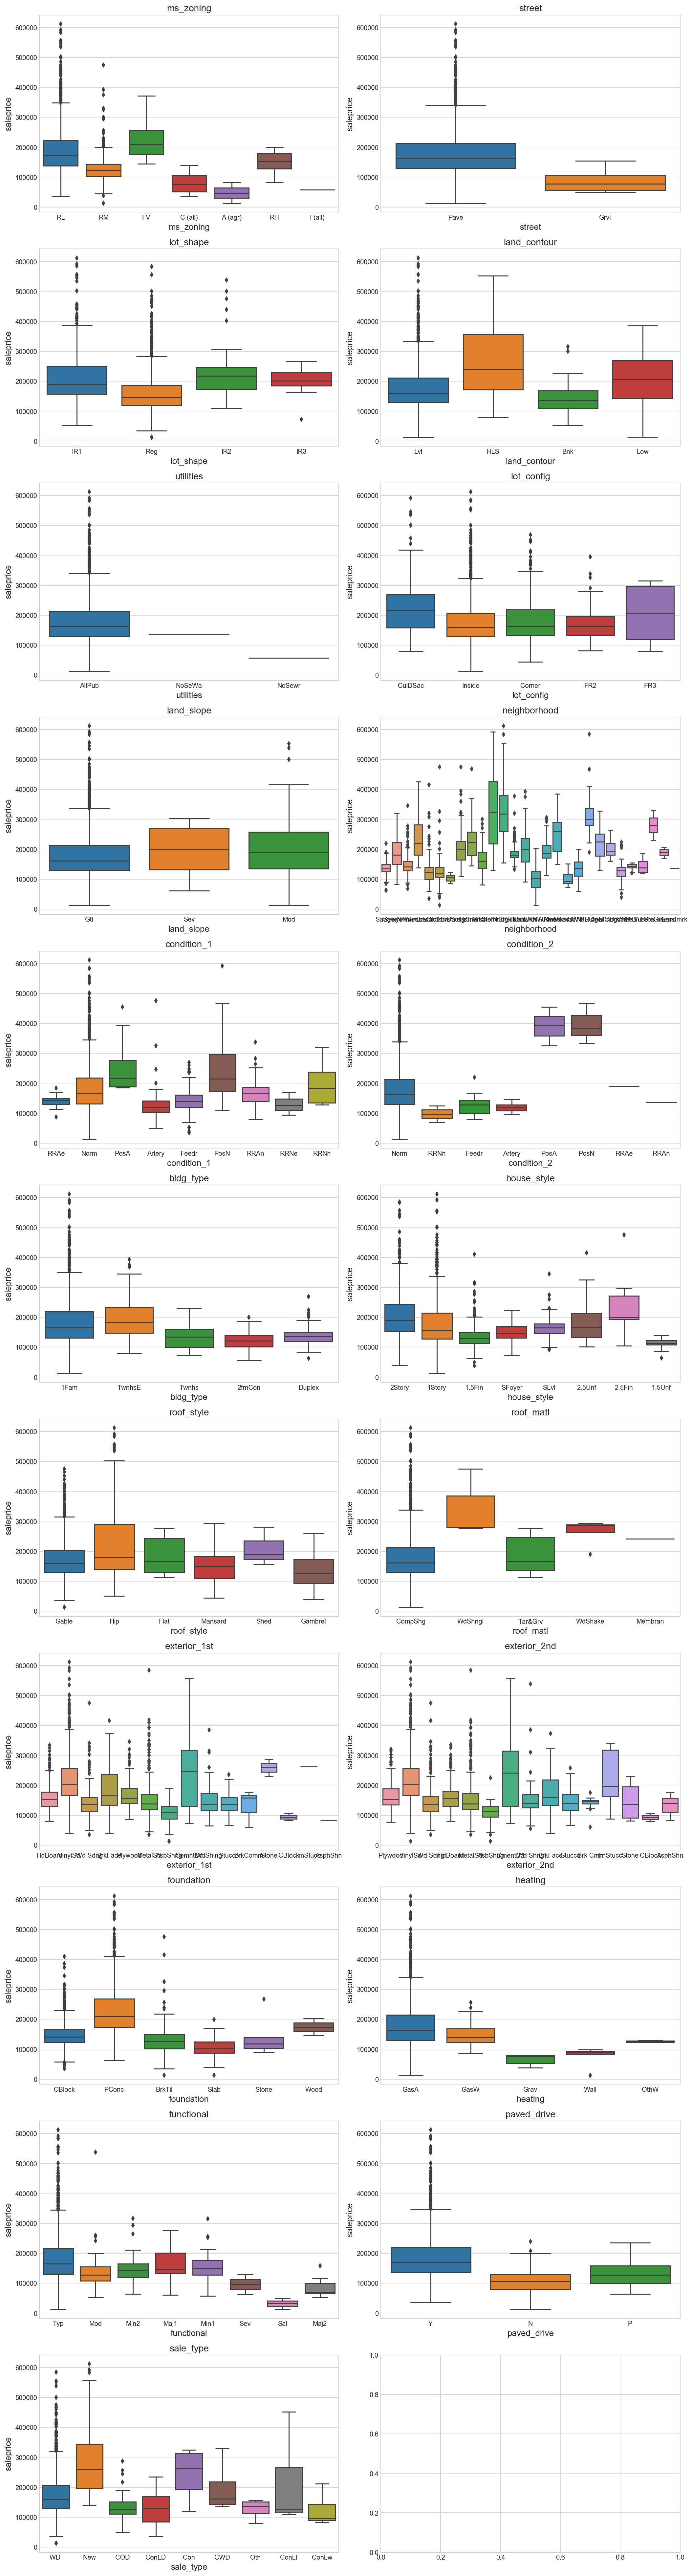

In [53]:
# plotting boxplots to look for nominal variables to be 'dummied'
subplot_boxplots(df, nominal_variables.columns)

### Creating Dummy Variables ( Qualitative )
> #### Variables with High Variation on Price

In [54]:
# creating a list of the variables to be dummied - chosen by analyzing boxplots
dummies_list = ['ms_zoning', 'condition_1', 'condition_2',
                'neighborhood', 'exterior_1st', 'exterior_2nd', 'sale_type']

In [55]:
# creating function to generate dummies for selected variables
def create_dummies(dataframe, dummies_list):
    dataframe = pd.get_dummies(dataframe, columns=dummies_list, drop_first=True)
    return dataframe

In [56]:
# add dummies to dataframe
df = create_dummies(df, dummies_list)

In [57]:
# printing all dummies created
dummies = df.columns[81:]
dummies.values

array(['gr_liv_area * kitchen_qual', 'bsmt_qual * gr_liv_area',
       'overall_qual * 1st_flr_sf', 'overall_qual * kitchen_qual',
       'overall_qual * exter_qual', 'overall_qual^2',
       'overall_qual * total_bsmt_sf', 'overall_qual * garage_area',
       'overall_qual * garage_cars', 'total_bsmt_sf * gr_liv_area',
       'overall_qual * bsmt_qual', 'overall_qual * year_built',
       'overall_qual * garage_yr_blt', 'overall_qual * totrms_abvgrd',
       'gr_liv_area * garage_area', 'overall_qual * year_remod/add',
       'gr_liv_area * garage_cars', 'ms_zoning_C (all)', 'ms_zoning_FV',
       'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL',
       'ms_zoning_RM', 'condition_1_Feedr', 'condition_1_Norm',
       'condition_1_PosA', 'condition_1_PosN', 'condition_1_RRAe',
       'condition_1_RRAn', 'condition_1_RRNe', 'condition_1_RRNn',
       'condition_2_Feedr', 'condition_2_Norm', 'condition_2_PosA',
       'condition_2_PosN', 'condition_2_RRAe', 'condition_2_RRAn',
       '

In [58]:
# creating a list for all the features
features = list(strong_correlations)

In [59]:
# adding all engineered features to the features list
for i in final_eng:
    features.append(i)

In [60]:
# adding the dummies created to the features list
for i in dummies.values:
    features.append(i)

In [61]:
features

['overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'bsmt_qual',
 'year_built',
 'garage_finish',
 'year_remod/add',
 'fireplace_qu',
 'full_bath',
 'garage_yr_blt',
 'totrms_abvgrd',
 'mas_vnr_area',
 'garage_area * garage_cars',
 'totrms_abvgrd * gr_liv_area',
 '1st_flr_sf * total_bsmt_sf',
 'garage_yr_blt * year_built',
 'total_area',
 'overall_qual * gr_liv_area',
 'exter_qual * gr_liv_area',
 'gr_liv_area * kitchen_qual',
 'bsmt_qual * gr_liv_area',
 'overall_qual * 1st_flr_sf',
 'overall_qual * kitchen_qual',
 'overall_qual * exter_qual',
 'overall_qual^2',
 'overall_qual * total_bsmt_sf',
 'overall_qual * garage_area',
 'overall_qual * garage_cars',
 'total_bsmt_sf * gr_liv_area',
 'overall_qual * bsmt_qual',
 'overall_qual * year_built',
 'overall_qual * garage_yr_blt',
 'overall_qual * totrms_abvgrd',
 'gr_liv_area * garage_area',
 'overall_qual * year_remod/add',
 'gr_liv_area * garage_cars',
 'gr_

In [62]:
print(len(df.columns))

182


In [63]:
# saving clean dataframe with created columns
df.to_csv('../datasets/train_clean.csv', index_label=False)

## Same with test data! from Kaggle

In [64]:
# reading train dataset into memmory
df = pd.read_csv('../datasets/test.csv')

In [65]:
# changing the column names to lower and underscores
df.columns = [column.lower().replace(' ','_') for column in df.columns]

In [66]:
# checking for null values
df.isnull().mean()[df.isnull().mean() > 0].sort_values(ascending=False)

pool_qc           0.995449
misc_feature      0.953356
alley             0.934016
fence             0.804323
fireplace_qu      0.480091
lot_frontage      0.182025
garage_yr_blt     0.051195
garage_finish     0.051195
garage_qual       0.051195
garage_cond       0.051195
garage_type       0.050057
bsmtfin_type_2    0.028441
bsmtfin_type_1    0.028441
bsmt_exposure     0.028441
bsmt_cond         0.028441
bsmt_qual         0.028441
mas_vnr_area      0.001138
mas_vnr_type      0.001138
electrical        0.001138
dtype: float64

In [67]:
# transform columns to numerical - This will fix some null values as well!

qualitative_to_numeric_dict = {'pool_qc': {'Ex': 5, 
                                           'Gd': 4,
                                           'TA': 3,
                                           'Fa': 2,
                                            np.nan: 0},
                               'misc_feature': {'Elev': 5,
                                                'Gar2': 4,
                                                'Othr': 3,
                                                'Shed': 2,
                                                'TenC': 1,
                                                 np.nan: 0},
                               'alley': {'Grvl': 2,
                                         'Pave': 1,
                                          np.nan: 0},
                               'fence': {'GdPrv': 4,
                                         'MnPrv': 3,
                                         'GdWo': 2,
                                         'MnWw': 1,
                                          np.nan: 0},
                               'fireplace_qu': {'Ex': 5, 
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1,
                                                 np.nan: 0},
                               'garage_cond': {'Ex': 5, 
                                               'Gd': 4,
                                               'TA': 3,
                                               'Fa': 2,
                                               'Po': 1,
                                                np.nan: 0},
                               'garage_qual': {'Ex': 5, 
                                               'Gd': 4,
                                               'TA': 3,
                                               'Fa': 2,
                                               'Po': 1,
                                                np.nan: 0},
                               'garage_finish': {'Fin': 3,
                                                 'RFn': 2,
                                                 'Unf': 1,
                                                 np.nan: 0},
                               'garage_type': {'2Types': 6,
                                               'Attchd': 5,
                                               'Basment': 4,
                                               'BuiltIn': 3,
                                               'CarPort': 2,
                                               'Detchd': 1,
                                                np.nan: 0},
                               'bsmt_exposure': {'Gd': 4,
                                                 'Av': 3,
                                                 'Mn': 2,
                                                 'No': 1,
                                                  np.nan: 0},
                               'bsmtfin_type_2': {'GLQ': 6,
                                                  'ALQ': 5,
                                                  'BLQ': 4,
                                                  'Rec': 3,
                                                  'LwQ': 2,
                                                  'Unf': 1,
                                                   np.nan: 0},
                               'bsmt_cond': {'Ex': 5, 
                                             'Gd': 4,
                                             'TA': 3,
                                             'Fa': 2,
                                             'Po': 1,
                                              np.nan: 0},
                               'bsmt_qual': {'Ex': 5, 
                                             'Gd': 4,
                                             'TA': 3,
                                             'Fa': 2,
                                             'Po': 1,
                                              np.nan: 0},
                               'bsmtfin_type_1': {'GLQ': 6,
                                                  'ALQ': 5,
                                                  'BLQ': 4,
                                                  'Rec': 3,
                                                  'LwQ': 2,
                                                  'Unf': 1,
                                                   np.nan: 0},
                               'mas_vnr_type': {'BrkCmn': 4,
                                                'BrkFace': 3,
                                                'CBlock': 2,
                                                'None': 0,
                                                 np.nan: 0,
                                                'Stone': 1},
                               'exter_qual': {'Ex': 5, 
                                              'Gd': 4,
                                              'TA': 3,
                                              'Fa': 2,
                                              'Po': 1},
                               'exter_cond': {'Ex': 5, 
                                              'Gd': 4,
                                              'TA': 3,
                                              'Fa': 2,
                                              'Po': 1},
                               'heating_qc': {'Ex': 5, 
                                              'Gd': 4,
                                              'TA': 3,
                                              'Fa': 2,
                                              'Po': 1},
                               'central_air': {'Y': 1, 
                                               'N': 0},
                               'kitchen_qual': {'Ex': 5, 
                                                'Gd': 4,
                                                'TA': 3,
                                                'Fa': 2,
                                                'Po': 1},
                               'electrical': {'SBrkr': 4,
                                              'FuseA': 3,
                                              'FuseF': 2,
                                              'FuseP': 1,
                                              'Mix': 0}
                              }  

In [68]:
# replace qualitative values by a range of integers
df.replace(qualitative_to_numeric_dict, inplace=True)

In [69]:
# checking for null columns again as see what is left
df.isnull().mean()[df.isnull().mean() > 0].sort_values(ascending=False)

lot_frontage     0.182025
garage_yr_blt    0.051195
electrical       0.001138
mas_vnr_area     0.001138
dtype: float64

In [70]:
# list of columns with null values
null_columns = [column for column in df.columns if df[column].isnull().sum() > 0]

In [71]:
null_columns

['lot_frontage', 'mas_vnr_area', 'electrical', 'garage_yr_blt']

In [72]:
# fill null values with the mean() for columns with higher correlation with 'saleprice'
df['mas_vnr_area'].fillna(df['mas_vnr_area'].median(), inplace=True)
df['garage_yr_blt'].fillna(df['garage_yr_blt'].median(), inplace=True)
df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace=True)
df['electrical'].fillna(df['electrical'].median(), inplace=True)

In [73]:
# checking for duplicated values
df.duplicated().mean()

0.0

In [74]:
# create an interaction term between strongly correlated variables
df['garage_area * garage_cars'] = df['garage_area'] * df['garage_cars']

# create an interaction term between strongly correlated variables
df['totrms_abvgrd * gr_liv_area'] = df['totrms_abvgrd'] * df['gr_liv_area']

# create an interaction term between strongly correlated variables
df['1st_flr_sf * total_bsmt_sf'] = df['1st_flr_sf'] * df['total_bsmt_sf']

# create an interaction term between strongly correlated variables
df['garage_yr_blt * year_built'] = df['garage_yr_blt'] * df['year_built']

In [75]:
# creating df['total_area']
df['total_area'] = df['total_bsmt_sf'] + df['1st_flr_sf'] + df['2nd_flr_sf'] \
                   + df['gr_liv_area'] + df['garage_area']

In [76]:
# adding features above to the dataframe: excluding features with saleprice and 
for i in new_features_eng.index:
    try:
        x, y = i.split(' ')
        if y == 'saleprice':
            continue
        else:
            df[x + ' * ' + y] = df[x] * df[y]
    except:
        df[i] = df[i[:len(i)-2]] * df[i[:len(i)-2]]

In [77]:
# creating dummies
df = create_dummies(df, dummies_list)

In [78]:
# inputting 0 for columns that do not exist on test set
for feature in features:
    if feature not in df.columns:
        df[feature] = 0
print(len(df.columns))

185


In [79]:
# saving clean dataframe
df.to_csv('../datasets/test_clean.csv', index_label=False)